# Exercice 1 - Harmonic and other oscillators
Trond Hauklien  
Physics 2, TFY4170, NTNU  
Date: 11.01.2023

In [55]:
import numpy as np
import matplotlib.pyplot as plt
newparams = {'figure.figsize': (16.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14, 'figure.facecolor': 'white'}
plt.rcParams.update(newparams)

Given the equation of motion for a harmonic oscillator

$$ 
m \ddot{x}(t) + k \cdot x(t) = 0. 
$$

We know $v(t) = \dot{x}$, which gives us a system of two first order ODEs:

$$
\begin{dcases}
  
    \dot{x} = v             & x(t_0) = 0 \\
    \dot{v} = -\frac{k}{m}x & v(t_0) = v_0

\end{dcases}
$$

We define $\mathbf{y} = [x, v]$ and $\dot{\mathbf{y}} = \mathbf{f}(t, y) = [v, -\frac{k}{m}x] $.


In [56]:
def f(y, t, k, m):
    return np.array([y[1], -k/m*y[0]])

In [57]:
def rk4(f, y0, t, k, m):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(len(t)-1):
        h = t[i+1] - t[i]
        k1 = h*f(y[i], t[i], k, m)
        k2 = h*f(y[i] + k1/2, t[i] + h/2, k, m)
        k3 = h*f(y[i] + k2/2, t[i] + h/2, k, m)
        k4 = h*f(y[i] + k3, t[i] + h, k, m)
        y[i+1] = y[i] + (k1 + 2*k2 + 2*k3 + k4)/6
    return y

In [58]:
# Define exact solution
def x(x_0, v_0, k, m, t):
    w = np.sqrt(k/m)
    return x_0*np.cos(w*t) + v_0/w*np.sin(w*t)

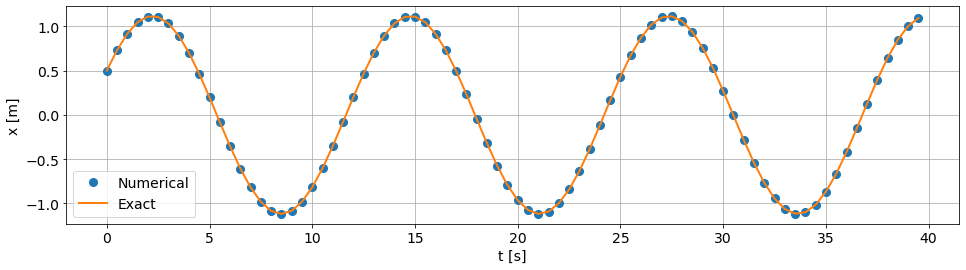

In [60]:
h = 0.5 # s
t = np.arange(0, 40, h)
x_0 = 0.5 # m
v_0 = 0.5 # m/s
y0 = np.array([x_0, v_0])
k = 1 # N/m
m = 4 # kg
y_n = rk4(f, y0, t, k, m)

plt.plot(t, y_n[:,0], "o")
plt.plot(t, x(x_0, v_0, k, m, t))
plt.xlabel("t [s]")
plt.ylabel("x [m]")
plt.legend(["Numerical", "Exact"])